# PyTorch Tensor Indexing, Broadcasting & Positional Encoding

This notebook covers the foundational operations in PyTorch:
- Tensor slicing & indexing
- Broadcasting behavior
- `squeeze()` and `unsqueeze()`
- Sinusoidal Positional Encoding (used in Transformers)

Let's go step by step and visualize as much as we can!

## Part 1: Slicing & Indexing

In [33]:
import torch

x = torch.tensor([10, 20, 30, 40, 50, 60])
# x[start:stop:step] works just like Python lists.
print("x[2:5]:", x[2:5])
print("x[::2]:", x[::2])
print("Reversed with torch.flip:", torch.flip(x, dims=[0]))

x[2:5]: tensor([30, 40, 50])
x[::2]: tensor([10, 30, 50])
Reversed with torch.flip: tensor([60, 50, 40, 30, 20, 10])


In [34]:
x = torch.arange(24).reshape(4, 6)
print("Original matrix (4x6):\n", x)

print("\nAll rows, column 2:", x[:, 2])
print("Row 1, all columns:", x[1, :])
print("Even columns:", x[:, 0::2])
print("Odd columns:", x[:, 1::2])
print("Reversed rows:", torch.flip(x, dims=[0]))
print("Reversed columns:", torch.flip(x, dims=[1]))

Original matrix (4x6):
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

All rows, column 2: tensor([ 2,  8, 14, 20])
Row 1, all columns: tensor([ 6,  7,  8,  9, 10, 11])
Even columns: tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22]])
Odd columns: tensor([[ 1,  3,  5],
        [ 7,  9, 11],
        [13, 15, 17],
        [19, 21, 23]])
Reversed rows: tensor([[18, 19, 20, 21, 22, 23],
        [12, 13, 14, 15, 16, 17],
        [ 6,  7,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  4,  5]])
Reversed columns: tensor([[ 5,  4,  3,  2,  1,  0],
        [11, 10,  9,  8,  7,  6],
        [17, 16, 15, 14, 13, 12],
        [23, 22, 21, 20, 19, 18]])


In [35]:
x = torch.tensor([
    [11, 12, 13, 14],
    [21, 22, 23, 24],
    [31, 32, 33, 34],
])
print("Original Tensor (3x4):\n", x)

print("\nGet row 0:", x[0])
print("Get col 1:", x[:, 1])
print("Get last column:", x[:, -1])
print("Get submatrix (rows 1-2, cols 1-3):\n", x[1:, 1:3])

Original Tensor (3x4):
 tensor([[11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34]])

Get row 0: tensor([11, 12, 13, 14])
Get col 1: tensor([12, 22, 32])
Get last column: tensor([14, 24, 34])
Get submatrix (rows 1-2, cols 1-3):
 tensor([[22, 23],
        [32, 33]])


## Part 2: Broadcasting Basics

In [36]:
a = torch.tensor([[1], [2], [3]])  # shape (3,1) -> 2D Tensor, i.e. matrix 3*1 (3 cols, 1 row)
b = torch.tensor([10, 20, 30])     # shape (3,) -> 1D tensor, ie vector, 1 row 
print("a:", a)
print("a shape:", a.shape)
print("\nb:", b)
print("b shape:", b.shape)

result = a + b                    # shape will be (3, 3) via broadcasting
print("\nBroadcasted addition result:\n", result)

a: tensor([[1],
        [2],
        [3]])
a shape: torch.Size([3, 1])

b: tensor([10, 20, 30])
b shape: torch.Size([3])

Broadcasted addition result:
 tensor([[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]])


## Part 3: squeeze() and unsqueeze()

In [37]:
# squeeze() removes dimensions with size 1
# This is useful when your tensor has unnecessary singleton dimensions, 
# often after operations like unsqueeze, broadcasting, or loading data.
x = torch.randn(3, 1, 4)
print("Original shape:", x.shape)       # (3, 1, 4)

x_squeezed = x.squeeze()
print("After squeeze:", x_squeezed.shape)  # (3, 4) -> singleton dimension 

Original shape: torch.Size([3, 1, 4])
After squeeze: torch.Size([3, 4])


In [38]:
# You can also specify which dimension to squeeze:
x = torch.randn(1, 5, 1)
print("x.shape:", x.shape)              # (1, 5, 1)

print("x.squeeze(0).shape:", x.squeeze(0).shape)  # removes dim 0 → (5, 1)
print("x.squeeze(2).shape:", x.squeeze(2).shape)  # removes dim 2 → (1, 5)

x.shape: torch.Size([1, 5, 1])
x.squeeze(0).shape: torch.Size([5, 1])
x.squeeze(2).shape: torch.Size([1, 5])


In [39]:
# unsqueeze(dim) adds a new dimension at the specified index.

x = torch.tensor([1, 2, 3])
print("Original shape:", x.shape)

print("unsqueeze(0):", x.unsqueeze(0).shape)  # (1, 3)
print("unsqueeze(1):", x.unsqueeze(1).shape)  # (3, 1)

Original shape: torch.Size([3])
unsqueeze(0): torch.Size([1, 3])
unsqueeze(1): torch.Size([3, 1])


## Part 4: Sinusoidal Positional Encoding

### Why Positional Encoding?
Transformers process tokens **in parallel**, so they don't know the position of words.
**Positional encodings** are added to token embeddings to give them a sense of order.

### Math Behind PE
- We use `sin(pos × freq)` and `cos(pos × freq)` to encode positions
- Different dimensions get different frequencies
- Low dimensions → high frequency (fast changes)
- High dimensions → low frequency (slow changes)
- Alternating `sin` / `cos` helps the model learn distance between tokens

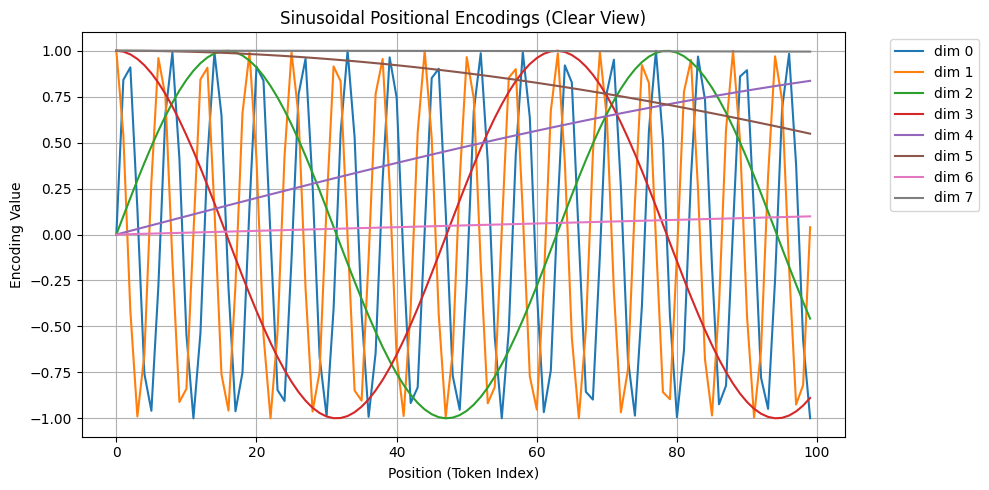

In [40]:
import math
import matplotlib.pyplot as plt

d_model = 8   # smaller for clarity
seq_len = 100

pos = torch.arange(seq_len).unsqueeze(1)  # (100,1)
i = torch.arange(d_model).unsqueeze(0)    # (1,8)

angle_rates = 1 / torch.pow(10000, (2 * (i // 2)) / d_model)
angle_rads = pos * angle_rates

pe = torch.zeros_like(angle_rads)
pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])

plt.figure(figsize=(10, 5))
for dim in range(d_model):
    plt.plot(pe[:, dim].numpy(), label=f'dim {dim}')
plt.title('Sinusoidal Positional Encodings (Clear View)')
plt.xlabel('Position (Token Index)')
plt.ylabel('Encoding Value')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Summary
- Output shape of PE: `(seq_len, d_model)`
- This gets **added to input embeddings** before feeding into the Transformer
- Each token now carries info about **content + position** ✨